# Importar Datos

Se utiliza:
- La librería numpy para el cálculo y manipulación de datos
- Pandas para el manejo de datos tabulares
- Matplotlib es una librería de visualización 

In [1]:
# CARGAR LAS LIBRERÍAS
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Archivos CSV

Es un formato utilizado para almacenar datos tabulares
- Hojas de cálculo
- Base de datos

Cargamos los archivos csv mediante pandas


In [2]:
# OBTENER DATOS ENTRENADOS Y DE PRUEBA
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

Los datos que obtenemos son imágenes de 28x28 pixeles en escala de grises

Cada imagen tiene su etiqueta y cada pixel (784 en total) su intensidad de luz (0-255)

In [3]:
# VER DATOS
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Preparar los datos

In [4]:
# OBTENER LAS ETIQUETAS
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

Quitamos la columna de etiquetas para tener solamente las características

In [5]:
#Quitar las clases para separar los datos
train.drop('label', axis = 1, inplace = True)

Conversión de DataFrame a NumPy array

In [6]:
#Extraer los datos de imagen de cada fila
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images]) # Cada fila se transforma en un matriz 2D
images = np.array([i.flatten() for i in images]) # Convierte cada matriz 2D a 1D en un arreglo 

LabelBinarizer:
- Biblioteca scikit-learn que se utiliza para realizar la codificación binaria de etiquetas (codificación one-hot )
- Convierte cada etiqueta categórica en un vector binario que con la misma longitud que el número de clases

La matriz de codificación one-hot es una forma estándar de representar etiquetas categóricas en aprendizaje automático, convirtiéndolas en vectores binarios donde solo una posición tiene el valor de 1 y el resto son 0s.

In [7]:
# Codificación one-hot
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


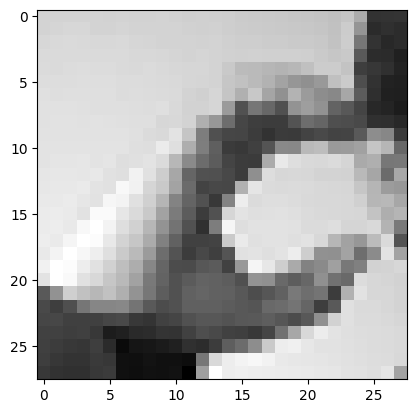

In [8]:
# Ver imagen
index = 3
print(labels[index])
plt.imshow(images[index].reshape(28,28), cmap='gray')

Se dividen los datos en un conjunto de entrenamiento y uno de prueba 

Se asigna el porcentaje para el conjunto de prueba y para el de entrenamiento

In [9]:
# Dividir los datos en x_train, x_test, y_train y y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 101)

TensorFlow
- Biblioteca de código abierto  utilizada para machine learning y deep learning

Batch_size
- Especifica el tamaño del lote de datos que se utilizará en cada paso de entrenamiento. 
- El lote de datos son el conjunto de ejemplos que se utilizan simultáneamente en una iteración del algoritmo de optimización

Epochs
- Representa el número de veces que el modelo pasará por todo el conjunto de datos de entrenamiento  

In [10]:
#Cargar tensorflow y definir el tamaño del batch
import tensorflow as tf
batch_size = 128
num_classes = 24
epochs = 10

Escalado de imágenes
- Se divice cada valor de píxel por 255. 
- Esto normaliza los valores de los píxeles para que estén en el rango [0, 1]. 

In [11]:
# Escalar imagenes
x_train = x_train/255
x_test = x_test/255

Redimensión de las imagenes para el tamaño requerido en TF y Keras

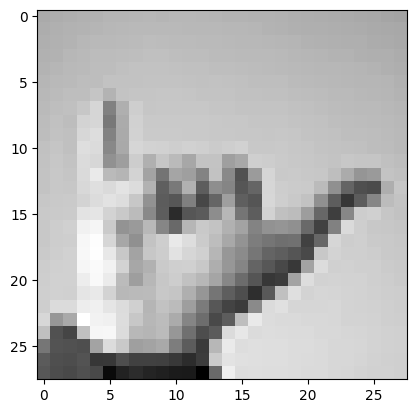

In [12]:
# Redimensionar las imagenes
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[1].reshape(28,28), cmap='gray')

# Red Neuronal Convolucional 

Tienen tres tipos principales de capas, que son:

Capa convolucional Conv2D: 

- Contiene un detector de características 2D conocido como kernel que se mueve a través de la imagen en campos receptivos de tamaño de 3x3, donde se multiplica cada pixel vecino para obtener un nuevo valor. Cuando se barre toda la imagen, se crea un mapa de características.
- Se aplica una transformación de Unidad lineal rectificada (ReLu) al mapa de características. Esta función activa una neurona solo si la entrada es mayor que cero. Es una funcion no lineal por lo que moldea relaciones complejas.



Capa de agrupamiento MaxPooling:

- Reducen la dimensionalidad de las características extraídas por las capas convolucionales. En este modelo, después de cada capa Conv2D, se añade una capa MaxPooling2D con un tamaño de ventana de 2x2.

Otra capa de convolución puede seguir a la capa de convolución inicial. Cuando esto sucede, la estructura de la CNN puede convertirse en jerárquica, ya que las capas posteriores pueden ver los píxeles dentro de los campos receptivos de las capas anteriores. La profundidad de una red es un factor importante para su capacidad de aprendizaje y generalización. Al agregar múltiples capas Conv2D y MaxPooling2D, se aumenta la profundidad de la red, lo que puede mejorar su capacidad para aprender representaciones más complejas de los datos.

Capa totalmente conectada:
Cada nodo de la capa de salida establece una conexión directa a un nodo en la capa anterior.

- La capa Flatten convierte las características extraídas por las capas convolucionales en un vector unidimensional.
- Luego se añade la capa Dense con 128 neuronas y función de activación ReLU que actua como una capa oculta que procesa las características extraídas y aprende representaciones más abstractas de las mismas.
- Una capa de regularización Dropout con una tasa de 0.2 evita el sobreajuste al apagar aleatoriamente algunas neuronas durante el entrenamiento.
- Finalmente, se añade una capa Dense con el número de clases y función de activación softmax. Esta capa produce la salida de la red, que representa las probabilidades de pertenencia a cada una de las clases.







In [13]:
# Crear nuestro modelo de CNN
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [14]:
# compilar
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [15]:
# Entrenar el modelo
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
172/172 [==============================] - 10s 52ms/step - loss: 2.4914 - accuracy: 0.2375 - val_loss: 1.4046 - val_accuracy: 0.5784
Epoch 2/10
172/172 [==============================] - 10s 58ms/step - loss: 1.1300 - accuracy: 0.6224 - val_loss: 0.7572 - val_accuracy: 0.7430
Epoch 3/10
172/172 [==============================] - 10s 60ms/step - loss: 0.6747 - accuracy: 0.7712 - val_loss: 0.4494 - val_accuracy: 0.8623
Epoch 4/10
172/172 [==============================] - 9s 53ms/step - loss: 0.4331 - accuracy: 0.8516 - val_loss: 0.2507 - val_accuracy: 0.9306
Epoch 5/10
172/172 [==============================] - 9s 54ms/step - loss: 0.2776 - accuracy: 0.9059 - val_loss: 0.1525 - val_accuracy: 0.9630
Epoch 6/10
172/172 [==============================] - 10s 56ms/step - loss: 0.1810 - accuracy: 0.9422 - val_loss: 0.0864 - val_accuracy: 0.9809
Epoch 7/10
172/172 [==============================] - 10s 55ms/step - loss: 0.1227 - accuracy: 0.9624 - val_loss: 0.0527 - val_accuracy: 0

In [16]:
# Guardar el modelo
model.save("sign_mnist_cnn_10_Epochs.h5")
print("Saved model")

Saved model


c:\Users\Dario 24\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Resultados

<function matplotlib.pyplot.show(close=None, block=None)>

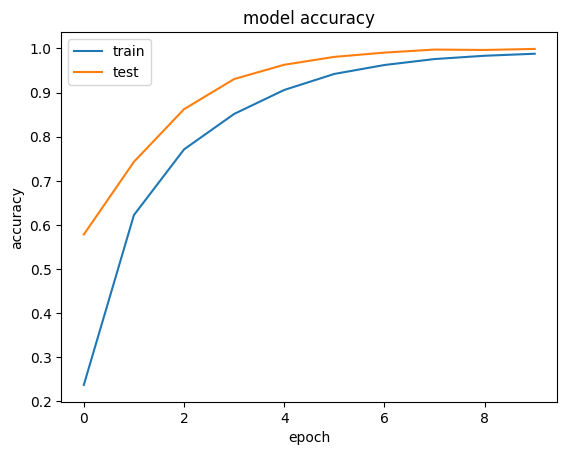

In [17]:
# Resumen del entrenamiento gráfico
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [18]:
# Redimensionar el test data para evaluar su rendimiento
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 5ms/step


In [19]:
# exactitud
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8248745119910764

In [20]:
# Función para obtener la letra correspondiente a cada clase
def get_letter(result):
    class_labels = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
        8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P',
        15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'W',
        22: 'X', 23: 'Y'
    }
    try:
        res = int(result)
        return class_labels[res]
    except:
        return "Error"

In [21]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Voltear el frame horizontalmente
    frame = cv2.flip(frame, 1)
    
    roi = frame[100:400, 20:320] 
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (20, 100), (320, 400), (255, 0, 0), 5)  # Cambiado de (320,100), (620,400) a (20,100), (320,400)

    roi = roi.reshape(1, 28, 28, 1)

    result = str(np.argmax(model.predict(roi, verbose=0)[0]))
    cv2.putText(copy, get_letter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Presiona 'q' para salir
        break

cap.release()
cv2.destroyAllWindows()